# Visualizing Code-N-Collab User Data

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

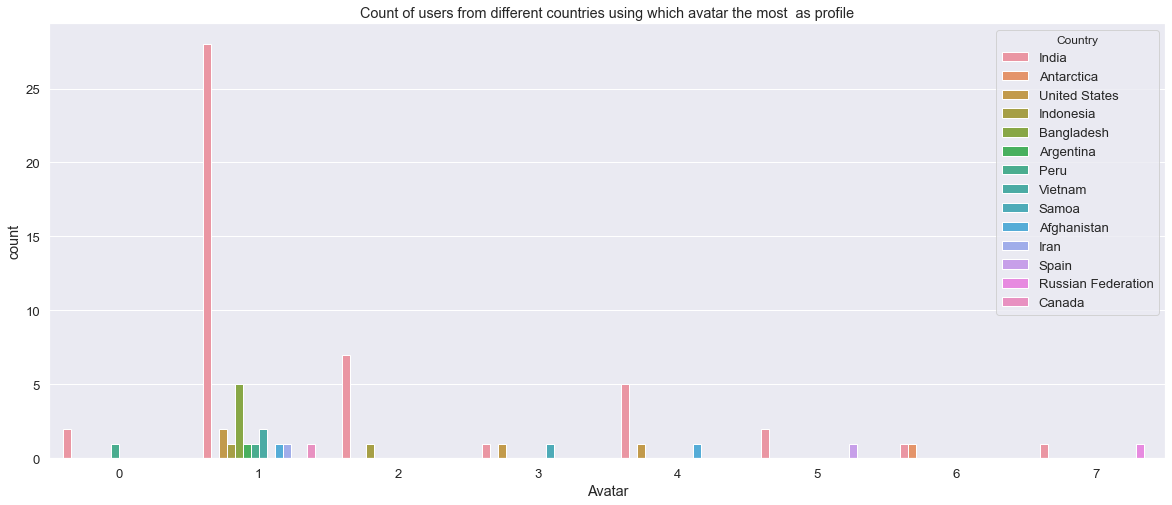

In [2]:
user_data = pd.read_csv("users.csv")
sns.set(font_scale=1.2)
plt.figure(figsize=(20,8))
plt.title("Count of users from different countries using which avatar the most  as profile")
sns.countplot(data=user_data,x="Avatar",hue="Country")
plt.show()

In [3]:
user_data.columns

Index(['AtCoder', 'Avatar', 'Blogs', 'Codechef', 'Codeforces',
       'CodeforcesHandle', 'Country', 'Deleted', 'Designation', 'Email',
       'Github', 'Institution', 'Linkedin', 'Moto', 'Name', 'SuperUser',
       'Verified', '__v', '_id', 'createdAt', 'token', 'updatedAt'],
      dtype='object')

In [4]:
null_data = user_data.isnull().sum()
#sns.countplot(data=Null_data,x="AtCoder")

In [5]:
null_data = pd.DataFrame(null_data)

In [6]:
null_data = null_data.reset_index()

In [7]:
null_data.head()

,index,0
0,AtCoder,112
1,Avatar,0
2,Blogs,0
3,Codechef,105
4,Codeforces,75


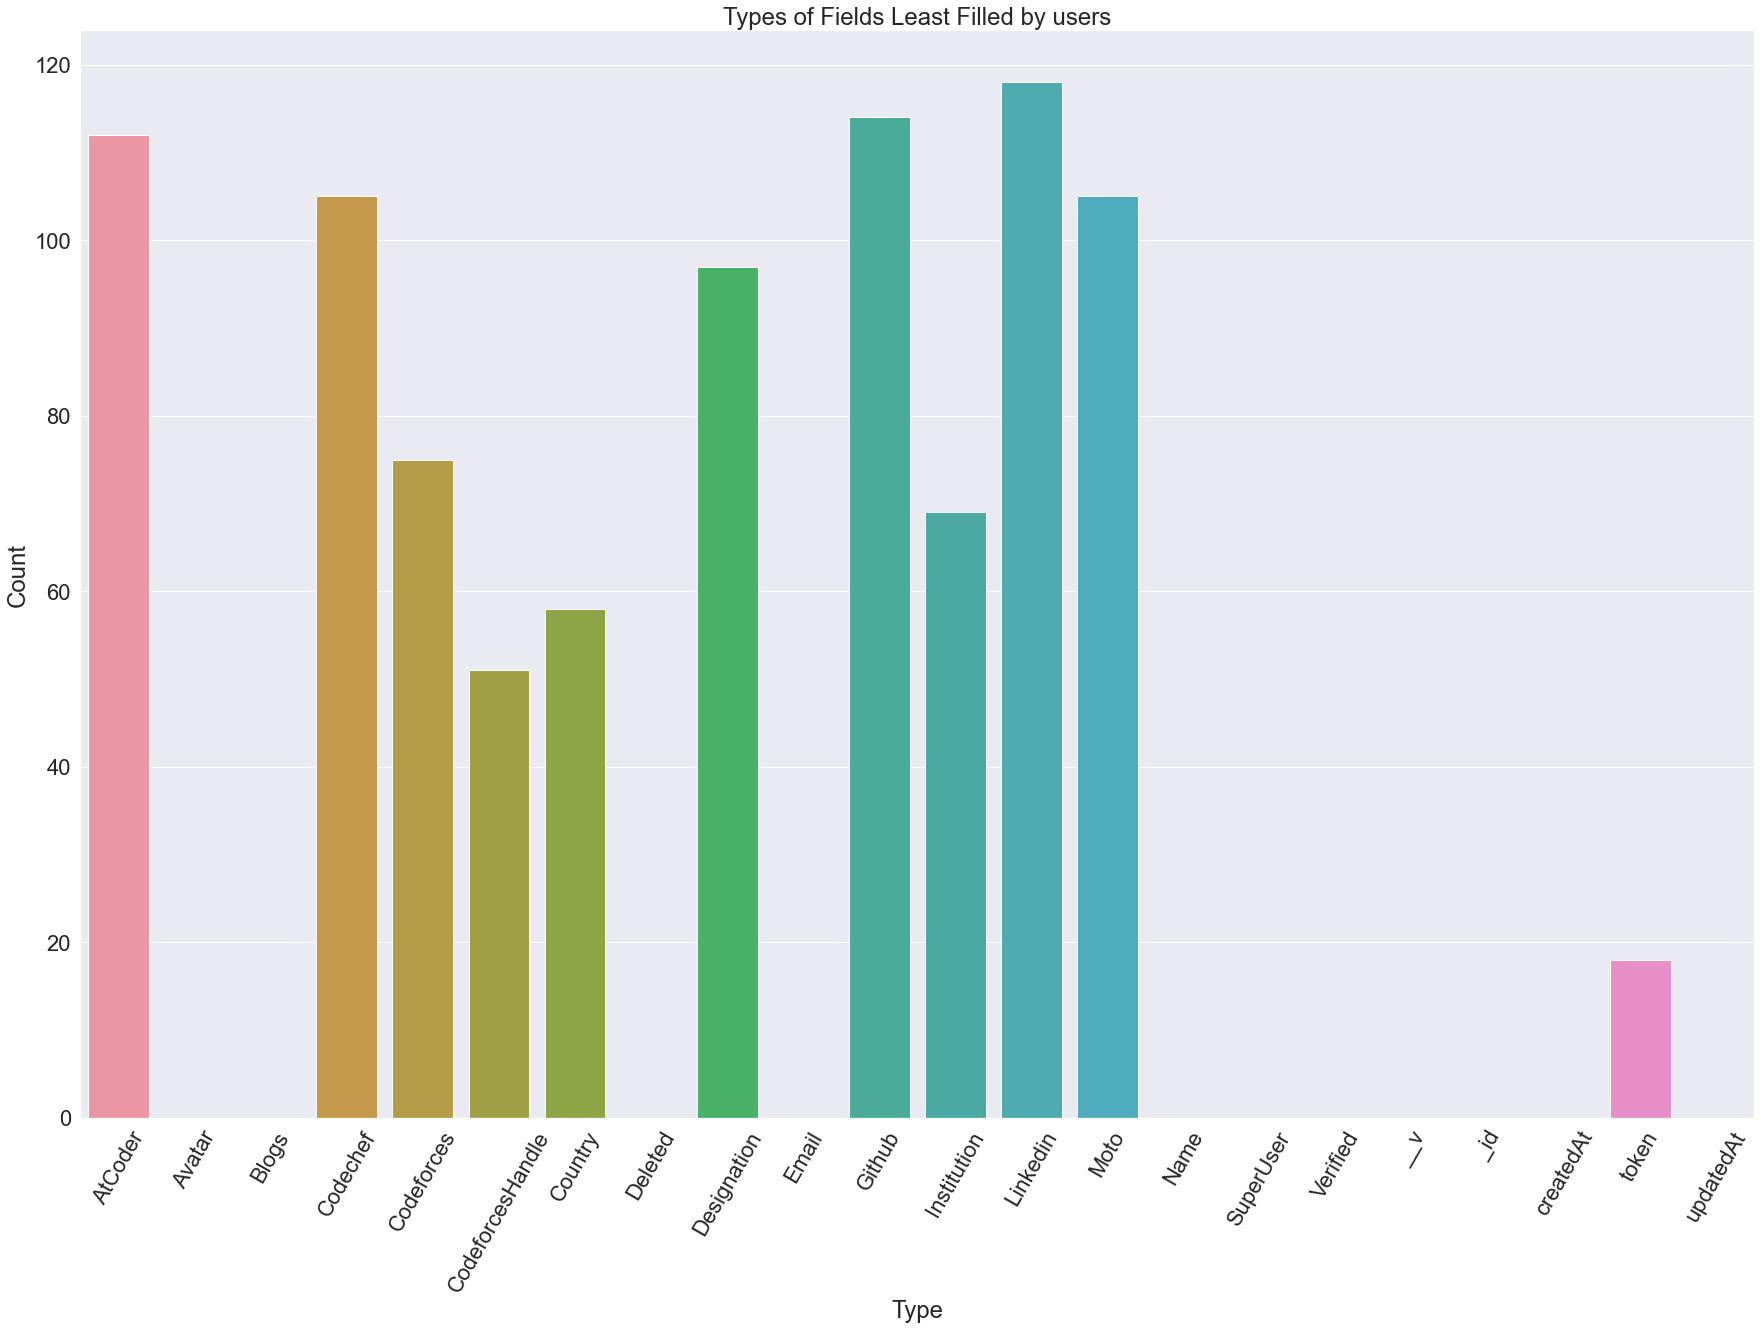

In [17]:
null_data.columns = ["Type","Count"]
plt.figure(figsize=(30,20))
plt.title("Types of Fields Least Filled by users")
sns.set(font_scale=2)
ax = sns.barplot(x = "Type",y="Count",data=null_data)
for label in ax.get_xticklabels():   # rotating x label for clear view
    label.set_rotation(60)

plt.show()

In [9]:
country_data = user_data.groupby("Country").count()
country_data.head()

,AtCoder,Avatar,Blogs,Codechef,Codeforces,CodeforcesHandle,Deleted,Designation,Email,Github,...,Linkedin,Moto,Name,SuperUser,Verified,__v,_id,createdAt,token,updatedAt
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,2,2,0,1,1,2,1,2,0,...,0,1,2,2,2,2,2,2,2,2
Antarctica,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Argentina,0,1,1,0,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
Bangladesh,1,5,5,1,2,5,5,3,5,1,...,1,1,5,5,5,5,5,5,5,5
Canada,0,1,1,0,1,1,1,0,1,0,...,0,0,1,1,1,1,1,1,1,1


In [10]:
country_data.index

Index(['Afghanistan', 'Antarctica', 'Argentina', 'Bangladesh', 'Canada',
       'India', 'Indonesia', 'Iran', 'Peru', 'Russian Federation', 'Samoa',
       'Spain', 'United States', 'Vietnam'],
      dtype='object', name='Country')

In [11]:
country_count = country_data["Email"].values

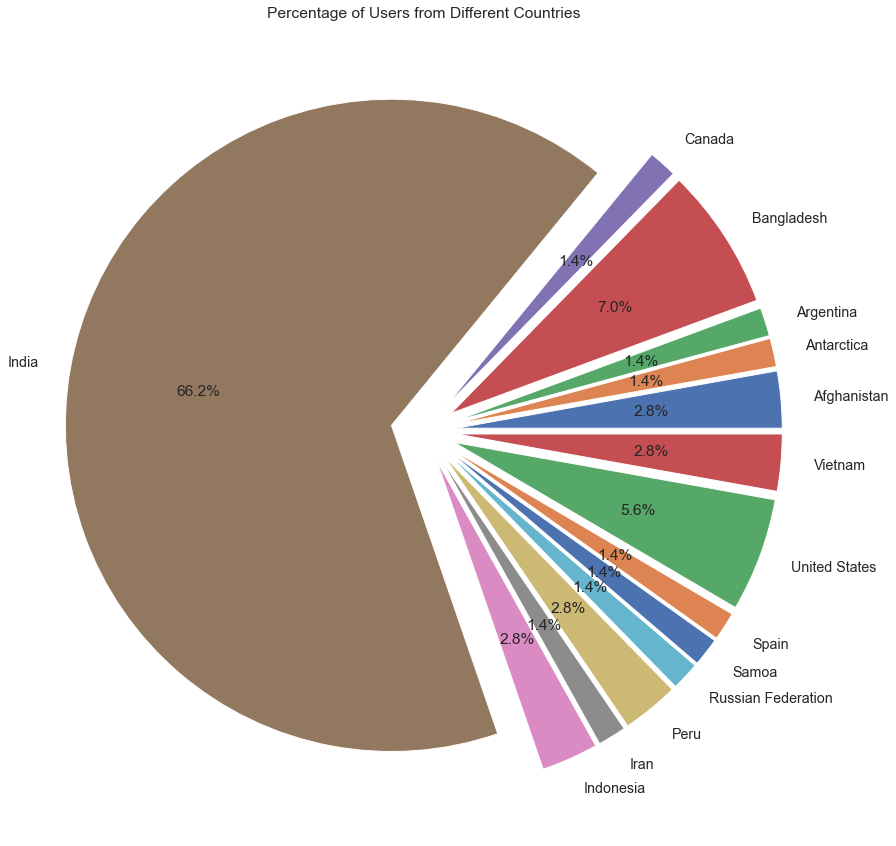

In [12]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.3)
plt.title("Percentage of Users from Different Countries")
plt.pie(country_count,labels=country_data.index,explode=[0.1 for i in range(len(country_data.index))] ,autopct="%1.1f%%");
plt.show()

In [13]:
user_data["createdAt"] = pd.to_datetime(user_data['createdAt'])
user_data["createdAt"] = user_data["createdAt"].dt.strftime('%m-%d')

In [14]:
user_join = user_data.groupby("createdAt").count()
user_join

,AtCoder,Avatar,Blogs,Codechef,Codeforces,CodeforcesHandle,Country,Deleted,Designation,Email,...,Institution,Linkedin,Moto,Name,SuperUser,Verified,__v,_id,token,updatedAt
createdAt,,,,,,,,,,,,,,,,,,,,,
06-23,0,2,2,0,0,2,2,2,2,2,...,2,0,2,2,2,2,2,2,0,2
06-24,1,7,7,2,3,3,3,7,2,7,...,3,2,2,7,7,7,7,7,5,7
06-25,1,3,3,1,1,1,2,3,2,3,...,2,1,2,3,3,3,3,3,2,3
06-26,0,3,3,0,0,1,0,3,0,3,...,0,0,0,3,3,3,3,3,2,3
06-27,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
06-28,0,4,4,0,1,2,2,4,1,4,...,2,0,0,4,4,4,4,4,2,4
06-30,0,1,1,0,0,0,1,1,0,1,...,1,0,0,1,1,1,1,1,1,1
07-01,4,25,25,6,17,19,16,25,8,25,...,15,3,7,25,25,25,25,25,24,25
07-02,6,31,31,5,12,19,16,31,6,31,...,15,2,5,31,31,31,31,31,26,31


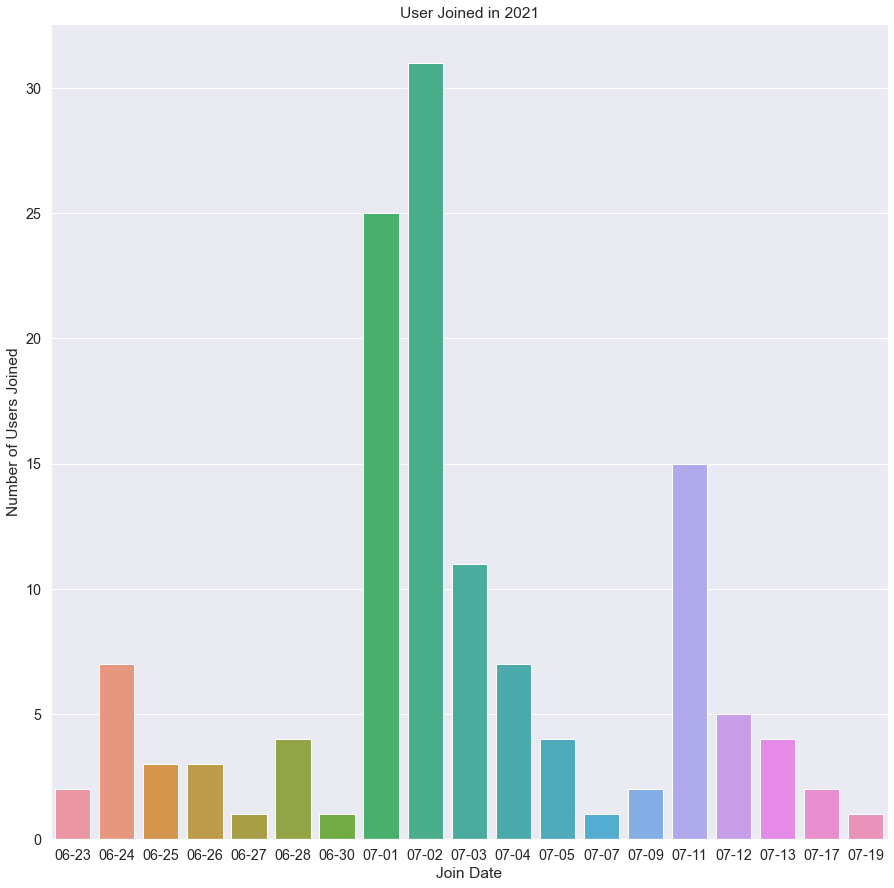

In [15]:
plt.figure(figsize=(15,15))
plt.title("User Joined in 2021")
sns.set(font_scale=1.2)
ax = sns.barplot(data=user_join,x=user_join.index,y="Email");
ax.set(xlabel='Join Date', ylabel='Number of Users Joined');
plt.show()